In [5]:
library(dplyr)
library(urltools)
library(ggplot2)

In [9]:
es <- read.table("../../btc/qrels/SemSearch_ES.txt", sep = "\t", quote = "", comment.char = "", as.is = TRUE, header = FALSE, col.names=c("qid","run","url","rel"))
ls <- read.table("../../btc/qrels/SemSearch_LS.txt", sep = "\t", quote = "", comment.char = "", as.is = TRUE, header = FALSE, col.names=c("qid","run","url","rel"))
ss <- bind_rows(es,ls)
ss$domain <- domain(ss$url)
ss.relevant <- ss %>% filter(rel > 0)
domain.counts <- ss.relevant %>% group_by(domain) %>% summarise(count = n()) %>% arrange(-count)

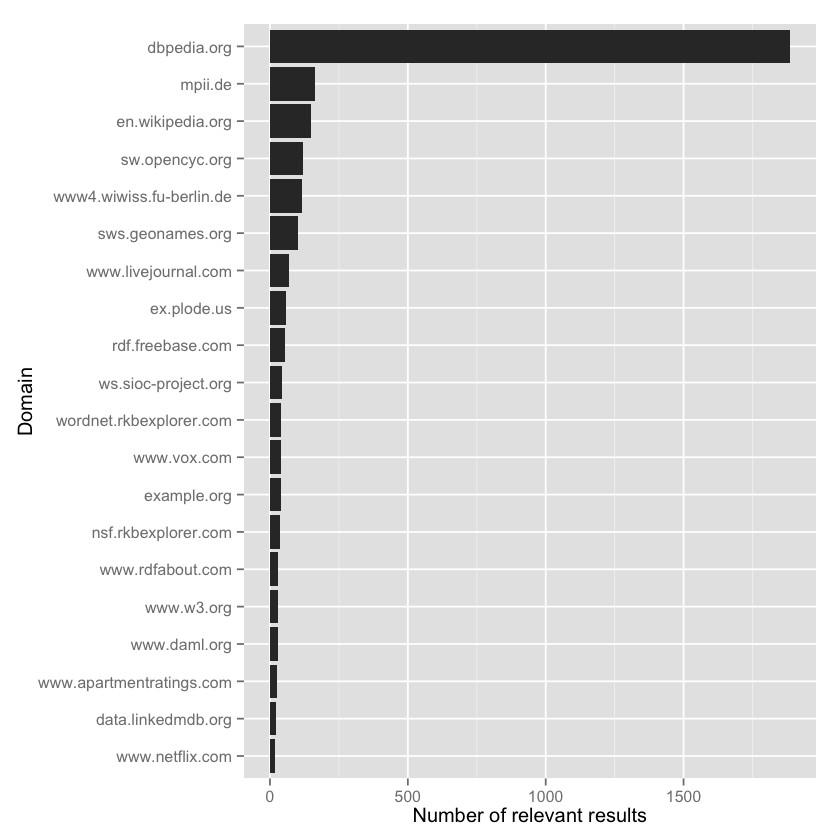

In [10]:
ggplot(domain.counts[0:20,], aes(x=reorder(domain,count), y=count)) +
  geom_bar(stat="identity") + coord_flip() + ylab("Number of relevant results") + xlab("Domain")

# Ratio of relevant DBpedia entities

In [11]:
sum(ss.relevant$domain == "dbpedia.org") / dim(ss.relevant)[1]

[1] 0.4906348